In [ ]:
# Uninstall Pillow
!pip uninstall -y Pillow

# Reinstall Pillow
!pip install Pillow


In [3]:
#PREPROCESSING 1 Workes Training
from PIL import Image, ImageDraw, ImageFont
import os

image_dir = 'training'

stamped_dir = 'training_stamp'
os.makedirs(stamped_dir, exist_ok=True)

stamp_text = 'September 11, 2023'

# Load and add a stamp to each image
for image_name in os.listdir(image_dir):
    image_path = os.path.join(image_dir, image_name)
    if os.path.isfile(image_path):  # Make sure it's a file
        with Image.open(image_path) as img:
            draw = ImageDraw.Draw(img)
            width, height = img.size

            # font
            font = ImageFont.load_default()

        
            # Assuming each character is about 6 pixels wide on average with the default font
            estimated_char_width = 6
            text_length = len(stamp_text)
            estimated_text_width = estimated_char_width * text_length

            # Calculate the x and y position to center the text
            x_position = (width - estimated_text_width) / 2
            y_position = (height - 10) / 2  # 10 is an arbitrary height estimate for the default font

            # Add text with a shadow for contrast
            shadow_offset = 1
            draw.text((x_position + shadow_offset, y_position + shadow_offset), stamp_text, font=font, fill="black")
            draw.text((x_position, y_position), stamp_text, font=font, fill="white")

            # Save the stamped image
            stamped_image_path = os.path.join(stamped_dir, image_name)
            img.save(stamped_image_path)


In [4]:
#PREPROCESSING 2 Workes Validation
from PIL import Image, ImageDraw, ImageFont
import os


image_dir = 'validation'

stamped_dir = 'validation_stamp'
os.makedirs(stamped_dir, exist_ok=True)

stamp_text = 'September 11, 2023'

# Load and add a stamp to each image
for image_name in os.listdir(image_dir):
    image_path = os.path.join(image_dir, image_name)
    if os.path.isfile(image_path):  # Make sure it's a file
        with Image.open(image_path) as img:
            draw = ImageDraw.Draw(img)
            width, height = img.size

            # font
            font = ImageFont.load_default()

           
            # Assuming each character is about 6 pixels wide on average with the default font
            estimated_char_width = 6
            text_length = len(stamp_text)
            estimated_text_width = estimated_char_width * text_length

            # Calculate the x and y position to center the text
            x_position = (width - estimated_text_width) / 2
            y_position = (height - 10) / 2  # 10 is an arbitrary height estimate for the default font

            # Add text with a shadow for contrast
            shadow_offset = 1
            draw.text((x_position + shadow_offset, y_position + shadow_offset), stamp_text, font=font, fill="black")
            draw.text((x_position, y_position), stamp_text, font=font, fill="white")

            # Save the stamped image
            stamped_image_path = os.path.join(stamped_dir, image_name)
            img.save(stamped_image_path)


2023-11-07 13:38:40.996858: I tensorflow/core/platform/cpu_feature_guard.cc:183] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: SSE3 SSE4.1 SSE4.2 AVX, in other operations, rebuild TensorFlow with the appropriate compiler flags.


Number of clean training images: 999
Number of stamped training images: 999
Number of clean validation images: 1000
Number of stamped validation images: 999
Adjusted number of clean validation images: 999
Number of stamped validation images: 999


2023-11-07 13:38:58.211333: E tensorflow/compiler/xla/stream_executor/cuda/cuda_driver.cc:268] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected


Epoch 1/10
32/32 [==============================] - 430s 13s/step - loss: 0.0363 - val_loss: 0.0131
Epoch 2/10
32/32 [==============================] - 414s 13s/step - loss: 0.0089 - val_loss: 0.0075
Epoch 3/10
32/32 [==============================] - 413s 13s/step - loss: 0.0062 - val_loss: 0.0054
Epoch 4/10
32/32 [==============================] - 414s 13s/step - loss: 0.0050 - val_loss: 0.0049
Epoch 5/10
32/32 [==============================] - 413s 13s/step - loss: 0.0043 - val_loss: 0.0040
Epoch 6/10
32/32 [==============================] - 415s 13s/step - loss: 0.0040 - val_loss: 0.0036
Epoch 7/10
32/32 [==============================] - 412s 13s/step - loss: 0.0036 - val_loss: 0.0035
Epoch 8/10
32/32 [==============================] - 411s 13s/step - loss: 0.0034 - val_loss: 0.0039
Epoch 9/10
32/32 [==============================] - 411s 13s/step - loss: 0.0035 - val_loss: 0.0034
Epoch 10/10
32/32 [==============================] - 410s 13s/step - loss: 0.0031 - val_loss: 0.0030

/home/oskarem/.local/lib/python3.10/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


1/1 [==============================] - 0s 136ms/step


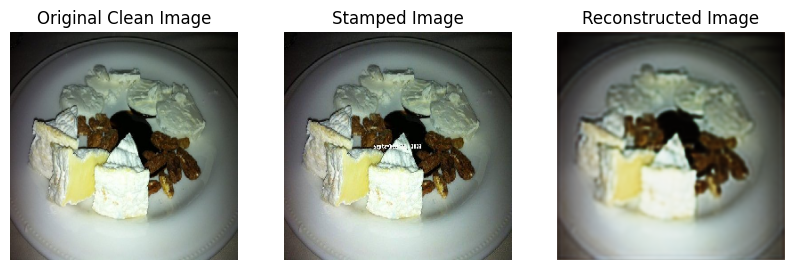

In [1]:
# Deep Autoencoders test 2 improved image quality from test 1
import os
os.environ['CUDA_VISIBLE_DEVICES'] = '-1'  # Forces TensorFlow to use CPU

import numpy as np
import matplotlib.pyplot as plt
from keras.preprocessing.image import img_to_array, load_img
from keras.layers import Input, Conv2D, MaxPooling2D, UpSampling2D, Dropout
from keras.models import Model
from keras.callbacks import EarlyStopping
from keras.optimizers import Adam
from random import randint

# ... rest of your code ...


# Paths to your data directories
clean_train_dir = 'training'
stamped_train_dir = 'training_stamp'
clean_val_dir = 'validation'
stamped_val_dir = 'validation_stamp'

def load_images(directory, max_images=1000):
    images = []
    for i, filename in enumerate(sorted(os.listdir(directory))):
        if i >= max_images:  # Stop if we have loaded max_images
            break
        if filename.lower().endswith(('.jpg', '.png')):
            path = os.path.join(directory, filename)
            image = load_img(path, target_size=(256, 256))  # Resize as needed
            image = img_to_array(image) / 255.0  # Normalize to [0,1]
            images.append(image)
    return np.array(images)

# Load a maximum of 1000 images from each dataset
clean_train_images = load_images(clean_train_dir, max_images=1000)
stamped_train_images = load_images(stamped_train_dir, max_images=1000)
clean_val_images = load_images(clean_val_dir, max_images=1000)
stamped_val_images = load_images(stamped_val_dir, max_images=1000)
print("Number of clean training images:", len(clean_train_images))
print("Number of stamped training images:", len(stamped_train_images))
print("Number of clean validation images:", len(clean_val_images))
print("Number of stamped validation images:", len(stamped_val_images))

clean_val_images = clean_val_images[:len(stamped_val_images)]

# Verify the change
print("Adjusted number of clean validation images:", len(clean_val_images))
print("Number of stamped validation images:", len(stamped_val_images))

# Define the autoencoder architecture
input_img = Input(shape=(256, 256, 3))  # Adjust the shape based on your image size and channels

# Encoder
x = Conv2D(64, (3, 3), activation='relu', padding='same')(input_img)
x = MaxPooling2D((2, 2), padding='same')(x)
x = Conv2D(128, (3, 3), activation='relu', padding='same')(x)
x = MaxPooling2D((2, 2), padding='same')(x)
x = Dropout(0.2)(x)

# ... Add more layers as needed

# Decoder
x = Conv2D(128, (3, 3), activation='relu', padding='same')(x)
x = UpSampling2D((2, 2))(x)
x = Conv2D(64, (3, 3), activation='relu', padding='same')(x)
x = UpSampling2D((2, 2))(x)
x = Dropout(0.2)(x)

# ... Add more layers as needed

output_img = Conv2D(3, (3, 3), activation='sigmoid', padding='same')(x)  # The output layer with 3 channels for RGB

# Model definition
autoencoder = Model(input_img, output_img)

# Compile the model
autoencoder.compile(optimizer=Adam(learning_rate=0.001), loss='mean_squared_error')

# Training the model
early_stopping = EarlyStopping(monitor='val_loss', patience=5)
autoencoder.fit(
    stamped_train_images, clean_train_images,
    epochs=10,  # More epochs might be necessary
    batch_size=32,  # Adjust batch size according to your GPU capacity
    shuffle=True,
    validation_data=(stamped_val_images, clean_val_images),
    callbacks=[early_stopping]
)

# Save the model
autoencoder.save('autoencoder.h5')

# Validate and show a random image
index = randint(0, len(clean_val_images)-1)
sample_clean = clean_val_images[index]
sample_stamped = stamped_val_images[index]
sample_reconstructed = autoencoder.predict(np.expand_dims(sample_stamped, axis=0))

plt.figure(figsize=(10, 4))

# Display clean image
plt.subplot(1, 3, 1)
plt.imshow(sample_clean)
plt.title('Original Clean Image')
plt.axis('off')

# Display stamped image
plt.subplot(1, 3, 2)
plt.imshow(sample_stamped)
plt.title('Stamped Image')
plt.axis('off')

# Display reconstructed image from autoencoder
plt.subplot(1, 3, 3)
plt.imshow(sample_reconstructed[0])
plt.title('Reconstructed Image')
plt.axis('off')

plt.show()


2023-11-07 15:28:51.734852: I tensorflow/core/platform/cpu_feature_guard.cc:183] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: SSE3 SSE4.1 SSE4.2 AVX, in other operations, rebuild TensorFlow with the appropriate compiler flags.


Number of clean training images: 999
Number of stamped training images: 999
Number of clean validation images: 1000
Number of stamped validation images: 999
Adjusted number of clean validation images: 999
Number of stamped validation images: 999


2023-11-07 15:29:22.993153: E tensorflow/compiler/xla/stream_executor/cuda/cuda_driver.cc:268] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected


Epoch 1/30
32/32 [==============================] - 390s 12s/step - loss: 0.0341 - val_loss: 0.0118
Epoch 2/30
32/32 [==============================] - 396s 12s/step - loss: 0.0089 - val_loss: 0.0071
Epoch 3/30
32/32 [==============================] - 386s 12s/step - loss: 0.0059 - val_loss: 0.0054
Epoch 4/30
32/32 [==============================] - 353s 11s/step - loss: 0.0049 - val_loss: 0.0048
Epoch 5/30
32/32 [==============================] - 354s 11s/step - loss: 0.0043 - val_loss: 0.0040
Epoch 6/30
32/32 [==============================] - 413s 13s/step - loss: 0.0038 - val_loss: 0.0036
Epoch 7/30
32/32 [==============================] - 347s 11s/step - loss: 0.0036 - val_loss: 0.0034
Epoch 8/30
32/32 [==============================] - 349s 11s/step - loss: 0.0036 - val_loss: 0.0042
Epoch 9/30
32/32 [==============================] - 350s 11s/step - loss: 0.0033 - val_loss: 0.0031
Epoch 10/30
32/32 [==============================] - 362s 11s/step - loss: 0.0030 - val_loss: 0.0030

/home/oskarem/.local/lib/python3.10/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


1/1 [==============================] - 0s 193ms/step


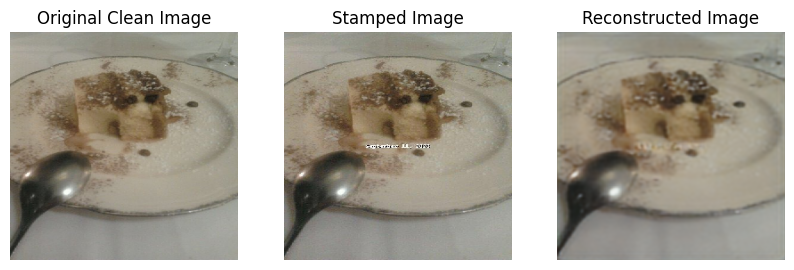

In [1]:
# Deep Autoencoders test 1 
import os
os.environ['CUDA_VISIBLE_DEVICES'] = '-1'  # Forces TensorFlow to use CPU

import numpy as np
import matplotlib.pyplot as plt
from keras.preprocessing.image import img_to_array, load_img
from keras.layers import Input, Conv2D, MaxPooling2D, UpSampling2D, Dropout
from keras.models import Model
from keras.callbacks import EarlyStopping
from keras.optimizers import Adam
from random import randint




clean_train_dir = 'training'
stamped_train_dir = 'training_stamp'
clean_val_dir = 'validation'
stamped_val_dir = 'validation_stamp'

def load_images(directory, max_images=1000):
    images = []
    for i, filename in enumerate(sorted(os.listdir(directory))):
        if i >= max_images:  # Stop if we have loaded max_images
            break
        if filename.lower().endswith(('.jpg', '.png')):
            path = os.path.join(directory, filename)
            image = load_img(path, target_size=(256, 256))  # Resize as needed
            image = img_to_array(image) / 255.0  # Normalize to [0,1]
            images.append(image)
    return np.array(images)


clean_train_images = load_images(clean_train_dir, max_images=1000)
stamped_train_images = load_images(stamped_train_dir, max_images=1000)
clean_val_images = load_images(clean_val_dir, max_images=1000)
stamped_val_images = load_images(stamped_val_dir, max_images=1000)
print("Number of clean training images:", len(clean_train_images))
print("Number of stamped training images:", len(stamped_train_images))
print("Number of clean validation images:", len(clean_val_images))
print("Number of stamped validation images:", len(stamped_val_images))

clean_val_images = clean_val_images[:len(stamped_val_images)]

print("Adjusted number of clean validation images:", len(clean_val_images))
print("Number of stamped validation images:", len(stamped_val_images))

# Define the autoencoder architecture
input_img = Input(shape=(256, 256, 3))  # Adjust the shape based on your image size and channels

# Encoder
x = Conv2D(64, (3, 3), activation='relu', padding='same')(input_img)
x = MaxPooling2D((2, 2), padding='same')(x)
x = Conv2D(128, (3, 3), activation='relu', padding='same')(x)
x = MaxPooling2D((2, 2), padding='same')(x)
x = Dropout(0.2)(x)


# Decoder
x = Conv2D(128, (3, 3), activation='relu', padding='same')(x)
x = UpSampling2D((2, 2))(x)
x = Conv2D(64, (3, 3), activation='relu', padding='same')(x)
x = UpSampling2D((2, 2))(x)
x = Dropout(0.2)(x)


output_img = Conv2D(3, (3, 3), activation='sigmoid', padding='same')(x)  # The output layer with 3 channels for RGB

# Model definition
autoencoder = Model(input_img, output_img)

# Compile the model
autoencoder.compile(optimizer=Adam(learning_rate=0.001), loss='mean_squared_error')

# Training the model
early_stopping = EarlyStopping(monitor='val_loss', patience=5)
autoencoder.fit(
    stamped_train_images, clean_train_images,
    epochs=30,  # More epochs might be necessary
    batch_size=32,  # Adjust batch size according to your GPU capacity
    shuffle=True,
    validation_data=(stamped_val_images, clean_val_images),
    callbacks=[early_stopping]
)

# Save the model
autoencoder.save('autoencoder.h5')

# Validate and show a random image
index = randint(0, len(clean_val_images)-1)
sample_clean = clean_val_images[index]
sample_stamped = stamped_val_images[index]
sample_reconstructed = autoencoder.predict(np.expand_dims(sample_stamped, axis=0))

plt.figure(figsize=(10, 4))

# Display clean image
plt.subplot(1, 3, 1)
plt.imshow(sample_clean)
plt.title('Original Clean Image')
plt.axis('off')

# Display stamped image
plt.subplot(1, 3, 2)
plt.imshow(sample_stamped)
plt.title('Stamped Image')
plt.axis('off')

# Display reconstructed image from autoencoder
plt.subplot(1, 3, 3)
plt.imshow(sample_reconstructed[0])
plt.title('Reconstructed Image')
plt.axis('off')

plt.show()


In [ ]:
# Generative Networks Test 1 
import tensorflow as tf
from tensorflow.keras import layers, models, optimizers
from tensorflow.keras.preprocessing.image import ImageDataGenerator
os.environ['CUDA_VISIBLE_DEVICES'] = '-1'  # Forces TensorFlow to use CPU
# Set your directories here
train_dir_clean = 'training'
train_dir_stamp = 'training_stamp'

# Define image dimensions and batch size
img_height = 256
img_width = 256
batch_size = 32
channels = 3




# Define the generator model
def build_generator():
    
    model = models.Sequential()
    model.add(layers.Dense(256, use_bias=False, input_shape=(img_height, img_width, channels)))
    model.add(layers.BatchNormalization())
    model.add(layers.LeakyReLU())

    model.add(layers.Reshape((16, 16, 1)))
    # Further generator layers...
    assert model.output_shape == (None, 16, 16, 1)  # Note: None is the batch size

    model.add(layers.Conv2DTranspose(128, (4, 4), strides=(1, 1), padding='same', use_bias=False))
    assert model.output_shape == (None, 16, 16, 128)
    model.add(layers.BatchNormalization())
    model.add(layers.LeakyReLU())

    model.add(layers.Conv2DTranspose(64, (4, 4), strides=(2, 2), padding='same', use_bias=False))
    assert model.output_shape == (None, 32, 32, 64)
    model.add(layers.BatchNormalization())
    model.add(layers.LeakyReLU())
    # Final Conv2DTranspose layer should output images with 3 channels
    model.add(layers.Conv2DTranspose(3, (4, 4), strides=(2, 2), padding='same', use_bias=False, activation='tanh'))
    assert model.output_shape == (None, 64, 64, 3)  # Adjust to match the final image size and channels

    return model

# The combined model (stacked generator and discriminator)
gan_input = layers.Input(shape=(img_height, img_width, channels))
gan_output = discriminator(generator(gan_input))
gan = models.Model(gan_input, gan_output)

gan.compile(loss='binary_crossentropy', optimizer=optimizers.Adam(1e-4))


# Define the discriminator model
def build_discriminator():
    model = models.Sequential()
    model.add(layers.Conv2D(64, (5, 5), strides=(2, 2), padding='same',
                                     input_shape=[img_height, img_width, channels]))
    model.add(layers.LeakyReLU())
    model.add(layers.Dropout(0.3))

    model.add(layers.Conv2D(128, (5, 5), strides=(2, 2), padding='same'))
    model.add(layers.LeakyReLU())
    model.add(layers.Dropout(0.3))

    model.add(layers.Flatten())
    model.add(layers.Dense(1))

    return model

# Compiling the discriminator
discriminator = build_discriminator()
discriminator.compile(loss='binary_crossentropy', optimizer=optimizers.Adam(1e-4))

# Creating the generator
generator = build_generator()

# The discriminator's parameters should not be updated during the generator's training.
discriminator.trainable = False

# The combined model (stacked generator and discriminator)
gan_input = layers.Input(shape=(100,))
gan_output = discriminator(generator(gan_input))
gan = models.Model(gan_input, gan_output)

gan.compile(loss='binary_crossentropy', optimizer=optimizers.Adam(1e-4))

# Data generators
train_datagen = ImageDataGenerator(rescale=1./255)

train_generator_clean = train_datagen.flow_from_directory(
    train_dir_clean,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode=None,  # Only images, no labels
    shuffle=True
)

train_generator_stamp = train_datagen.flow_from_directory(
    train_dir_stamp,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode=None,  # Only images, no labels
    shuffle=True
)

# Calculate the correct number of steps per epoch
steps_per_epoch = min(train_generator_clean.samples, train_generator_stamp.samples) // batch_size

# Training the GAN
def train_gan(gan, generator, discriminator, epochs, steps_per_epoch):
    for epoch in range(epochs):
        for step in range(steps_per_epoch):
            # Get a batch of real images
            real_images = next(train_generator_clean)
            # Generate a batch of fake images
            fake_images = generator.predict(real_images)

            # Combine them with real images
            combined_images = tf.concat([fake_images, real_images], axis=0)
            # Assemble labels discriminating real from fake images
            labels = tf.concat([tf.zeros((batch_size, 1)), tf.ones((batch_size, 1))], axis=0)
            # Add random noise to the labels - important trick!
            labels += 0.05 * tf.random.uniform(tf.shape(labels))
            # Train the discriminator
            d_loss = discriminator.train_on_batch(combined_images, labels)
            
            # Sample random points in the latent space
            random_latent_vectors = tf.random.normal(shape=(batch_size, 100))
            # Assemble labels that say "all real images" (lie!)
            misleading_targets = tf.ones((batch_size, 1))
            # Train the generator (via the GAN model, where the discriminator weights are frozen)
            g_loss = gan.train_on_batch(random_latent_vectors, misleading_targets)

            print(f'Epoch: {epoch+1}/{epochs}, Step: {step+1}/{steps_per_epoch}, D Loss: {d_loss}, G Loss: {g_loss}')

# Set the number of epochs
epochs = 50

# Train the GAN
train_gan(gan, generator, discriminator, epochs, steps_per_epoch)
